# Model 6a: Embedding-Based Model (Universal Sentence Encoder + Logistic Regression)

## 🎯 Objective:
Use a pretrained embedding model (Universal Sentence Encoder) to capture deep semantic meaning of headlines, and apply a simple classifier (e.g., Logistic Regression) on top.

## 🔧 Steps:
1. Import Libraries & Load Data
    - Load data.csv as usual
    - Prepare X_train, X_test, y_train, y_test

2. Text Embedding
    - Use Universal Sentence Encoder (USE) via tensorflow_hub
    - Encode each headline into a 512-dimensional dense vector

3. Model Training
    - Use LogisticRegression on the embedded vectors

5. Evaluation:
    - Accuracy, classification report

6. Confusion matrix

##  ✅ Purpose:
Leverage semantic-rich embeddings instead of hand-crafted features (TF-IDF). This gives a dense **representation of meaning**, and allows comparison with classical models from Model 0 and 2.

## 1. Import Librairies and load data

In [15]:
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from model_eval import save_model_results
import time


In [2]:
df = pd.read_csv("data/training_data_lowercase.csv", sep="\t", header=None, names=["label", "title"])
# data.reset_index(drop=True, inplace=True)  # optional

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df["title"], df["label"], test_size=0.2, random_state=42)

df.head()

,label,title
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


## 2. Text embbeding

### Load Universal Sentence Encoder (USE)

In [3]:
# Load pretrained USE model (takes a moment the first time)
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print("USE model loaded.")

USE model loaded.


### Embed the Text:

In [4]:
# Convert Series to list (required for USE)
X_train_emb = embed(X_train.tolist())
X_test_emb = embed(X_test.tolist())

## 3. Train Logistic Regression:

In [16]:
# Model training
start_time = time.time()
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_emb, y_train)
training_time_minutes = (time.time() - start_time) / 60

## 4. Evaluation:

In [17]:
# Evaluation
y_pred = clf.predict(X_test_emb)

train_accuracy = clf.score(X_train_emb, y_train)
test_accuracy = accuracy_score(y_test, y_pred)  # Using already calculated y_pred

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9244620114185331
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3529
           1       0.91      0.93      0.92      3302

    accuracy                           0.92      6831
   macro avg       0.92      0.92      0.92      6831
weighted avg       0.92      0.92      0.92      6831



## 5. Confusion Matrix Plot:

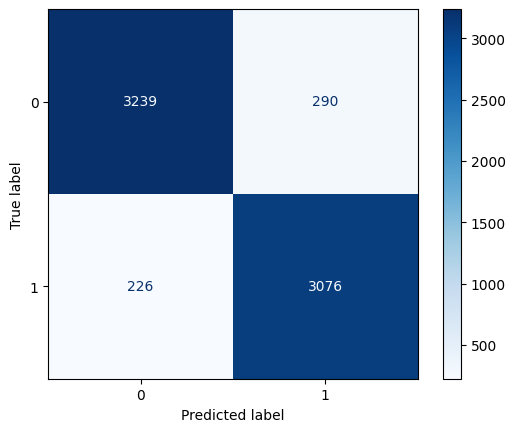

In [18]:
# Optional: show confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test_emb, y_test, cmap="Blues")

## 6. Save Model Eval Metrics:

In [19]:
# Save results using the model_eval module
save_model_results(
    model_name="Model6a_USE_LR",
    display_name="Universal Sentence Encoder + Logistic Regression",
    accuracy=test_accuracy,
    training_time_minutes=training_time_minutes,
    model_architecture="Logistic Regression with Universal Sentence Encoder embeddings (512-dim)",
    preprocessing_type="universal_sentence_encoder",
    train_accuracy=train_accuracy,
    hyperparameters={
        "embedding_model": "universal-sentence-encoder/4",
        "embedding_dimensions": 512,
        "C": clf.C,
        "max_iter": clf.max_iter,
        "random_state": 42
    },
    dataset_info={
        "training_samples": len(X_train_emb),
        "test_samples": len(X_test_emb),
        "embedding_dimensions": X_train_emb.shape[1],
        "embedding_model": "TensorFlow Hub Universal Sentence Encoder v4"
    }
)

print("Model results saved successfully!")
print(f"Model: Universal Sentence Encoder + Logistic Regression")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Time: {training_time_minutes:.2f} minutes")
print(f"Embedding Dimensions: {X_train_emb.shape[1]}")

Results saved to results/Model6a_USE_LR_results.json
Model: Universal Sentence Encoder + Logistic Regression
Accuracy: 0.9245 (92.45%)
Training Time: 0.01 minutes
Model results saved successfully!
Model: Universal Sentence Encoder + Logistic Regression
Training Accuracy: 0.9235
Test Accuracy: 0.9245
Training Time: 0.01 minutes
Embedding Dimensions: 512
